In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt ##Data visualisation libraries 
import seaborn as sns
%matplotlib inline

In [4]:
StrgthDistance = pd.read_csv('StrengthandDistanceData.csv')
StrgthDistance.info()
StrgthDistance.columns
StrgthDistance.describe()
StrgthDistance.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
weightlifted      28 non-null float64
distancethrown    28 non-null float64
dtypes: float64(2)
memory usage: 528.0 bytes


,weightlifted,distancethrown
0,37.5,6.4
1,51.5,10.2
2,61.3,12.4
3,61.3,13.0
4,63.6,13.2


C:\Users\Harshada\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Harshada\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


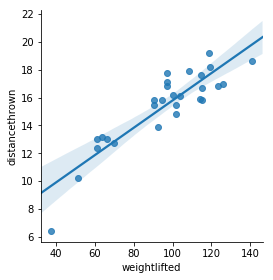

In [19]:
#sns.pairplot(StrgthDistance)

sns.pairplot(StrgthDistance, x_vars=['weightlifted'], y_vars='distancethrown', size=4, kind='reg')

In [5]:
x = StrgthDistance['weightlifted']
y = StrgthDistance['distancethrown']
#x.head()
y.head()

0     6.4
1    10.2
2    12.4
3    13.0
4    13.2
Name: distancethrown, dtype: float64

C:\Users\Harshada\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


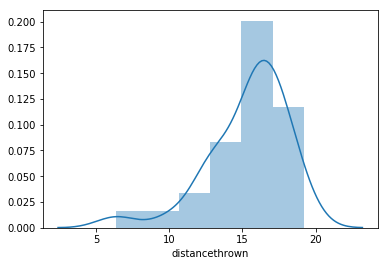

In [27]:
sns.distplot(StrgthDistance['distancethrown'])

In [6]:
# check the type and shape of X
print(type(x))
print(x.shape)

<class 'pandas.core.series.Series'>
(28,)


In [7]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(28,)


In [30]:
from sklearn.model_selection import train_test_split

X_train, Y_train, X_test, Y_test = train_test_split(X,Y,random_state=1)

In [31]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(21,)
(7,)
(21,)
(7,)


In [33]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()


In [40]:
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 

In [43]:
 def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
   # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    # function to show plot 
    plt.show()   

Estimated coefficients:
b_0 = 5.959629098373982
b_1 = 0.09834382159781967


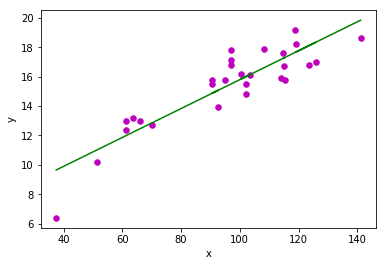

In [44]:
 def main(): 
    # observations 
    x = StrgthDistance['weightlifted']
    y = StrgthDistance['distancethrown']
  
    # estimating coefficients 
    b = estimate_coef(x, y) 
    print("Estimated coefficients:\nb_0 = {}\nb_1 = {}".format(b[0], b[1])) 
  
    # plotting regression line 
    plot_regression_line(x, y, b) 
    
    #sns.pairplot(StrgthDistance, x_vars=['weightlifted'], y_vars='distancethrown', size=4, kind='reg')
    
if __name__ == "__main__": 
    main() 

In [23]:
import statsmodels.api as sm
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:         distancethrown   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     102.4
Date:                Sat, 13 Apr 2019   Prob (F-statistic):           1.66e-10
Time:                        15:55:53   Log-Likelihood:                -45.285
No. Observations:                  28   AIC:                             94.57
Df Residuals:                      26   BIC:                             97.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.9596      0.959      6.215   

In [25]:
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         distancethrown   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     102.4
Date:                Sat, 13 Apr 2019   Prob (F-statistic):           1.66e-10
Time:                        15:59:38   Log-Likelihood:                -45.285
No. Observations:                  28   AIC:                             94.57
Df Residuals:                      26   BIC:                             97.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.9596      0.959      6.215      0.000       3.989       7.931
weightlifted     0.0983      0.010     10.117      0.000       0.078       0.118
==============================================================================
Omnibus:                        1.383   Durbin-Watson:                   1.236
Prob(Omnibus):                  0.501   Jarque-Bera (JB):                0.913
Skew:                          -0.441   Prob(JB):                        0.633
Kurtosis:                       2.923   Cond. No.                         396.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""